# Importering av bibliotek

In [2]:
# pip3 install numpy matplotlib pandas seaborn scipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from scipy.stats import norm

# Definering av funksjoner

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def trainWeightsMSE(x_train, y_train, alpha, iterations):
    x = np.column_stack((x_train, np.ones(len(x_train))))
    x_T = x.T
    t_k=np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
    weights = np.zeros((3,5))
    mse = np.zeros(iterations)

    for it in range(iterations):
        gradMSE = 0
        mseIt = 0
        z_k = np.dot(weights, x_T)
        g_k = sigmoid(z_k)
        for i in range(g_k.shape[1]):
            diff = (g_k[:,i] - t_k[:,int(y_train[i])-1])
            gradMSE += np.dot((diff * g_k[:,i] * (np.ones(len(g_k[:,i])) - g_k[:,i])).reshape(3,1), x_T[:,i].reshape(1,5))
            mseIt += np.dot(diff.T , diff)
        mse[it] = mseIt / 2
        weights -=  alpha*gradMSE

    return [weights, mse]

def predict(x_test, weights):
    x = np.column_stack((x_test, np.ones(len(x_test))))
    g_test = np.dot(weights, x.T)
    Y_pred = np.argmax(g_test, axis=0) + 1
    return Y_pred

def calcErrorRateAndCM(y_test, y_pred):
    cm = np.zeros((3,3))
    for i in range(len(y_test)):
        cm[int(y_test[i])-1, y_pred[i]-1] += 1
    err = 1 - np.trace(cm)/np.sum(cm)
    return [err,cm]

# Innlastning av data

In [4]:
data = np.loadtxt("IrisData/iris.data", delimiter=",", usecols=(0,1,2,3))

x1 = data[0:50,:]
x2 = data[50:100,:]
x3 = data[100:150,:]

x1_train = x1[0:30,:]; x1_test = x1[30:50,:]
x2_train = x2[0:30,:]; x2_test = x2[30:50,:]
x3_train = x3[0:30,:]; x3_test = x3[30:50,:]

X_train = np.vstack((x1_train, x2_train, x3_train))
Y_train = np.concatenate((np.ones(30), 2*np.ones(30), 3*np.ones(30)))

X_test = np.vstack((x1_test, x2_test, x3_test))
Y_test = np.concatenate((np.ones(20), 2*np.ones(20), 3*np.ones(20)))

# Opplæring

In [5]:
its = 2500
alphas = [1, 0.1, 0.01, 0.001]

mses = np.zeros((len(alphas),its))
W = np.zeros((len(alphas), 3, 5))

for a, alpha in enumerate(alphas):
    W[a], mses[a] = trainWeightsMSE(X_train, Y_train, alpha, its)

# Plot MSE for forskjellige alpha

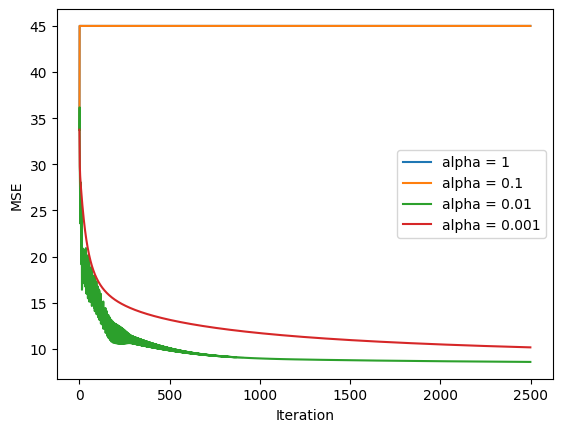

In [6]:
plt.figure()
for a in range(len(alphas)):
    plt.plot(mses[a], label="alpha = " + str(alphas[a]))
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.legend()
plt.show()

# Testing av vekter og resultater

[[20.  0.  0.]
 [ 0. 18.  2.]
 [ 0.  0. 20.]]
Error rate:  3.333 %


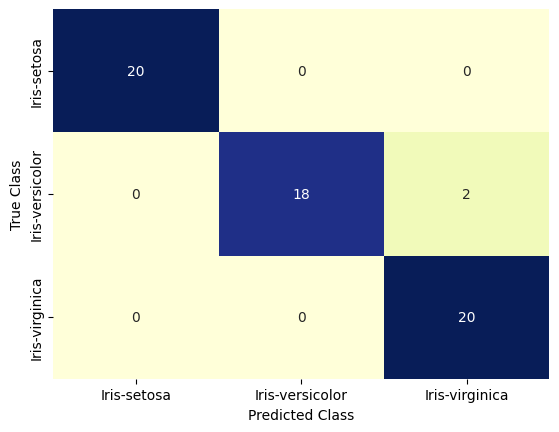

In [7]:
Y_pred = predict(X_test, W[2])

error_rate , confusion_matrix = calcErrorRateAndCM(Y_test, Y_pred)

print(confusion_matrix)
print("Error rate: ", round(error_rate*100,3), "%")

class_labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

df_cm = pd.DataFrame(confusion_matrix, index = class_labels,
                  columns = class_labels)
plt.figure()
sn.heatmap(df_cm, annot=True, cmap="YlGnBu", cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

# Histogram av Data

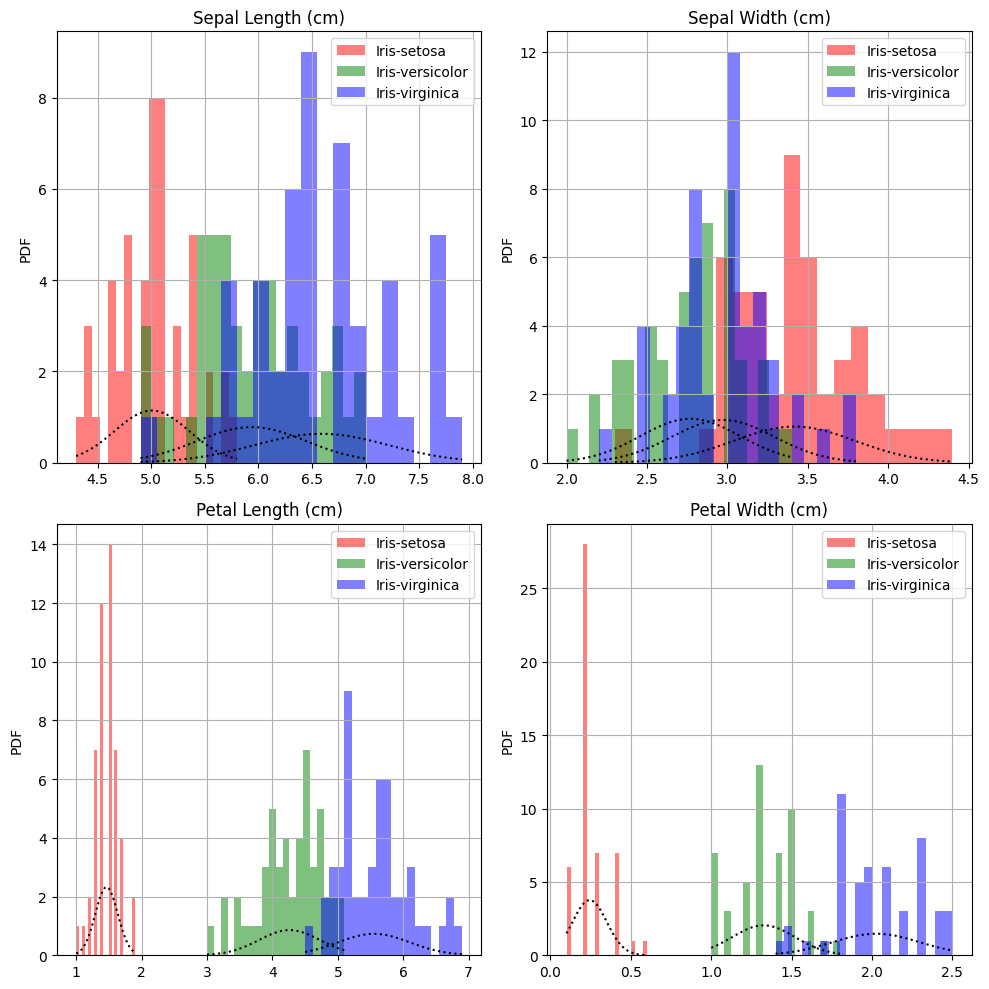

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

colors = ['red', 'green', 'blue']
data = [x1, x2, x3]
features = ['Sepal Length (cm)', 'Sepal Width (cm)', 'Petal Length (cm)', 'Petal Width (cm)']

index = 0
for i in range(2):
    for j in range(2):
        for k in range(3):

            n, bins, patches = axs[i, j].hist(data[k][:, index], color=colors[k], label=class_labels[k], alpha=0.5, bins=20)
            
            mu, std = norm.fit(data[k][:, index])
            xmin, xmax = bins[0], bins[-1]
            x = np.linspace(xmin, xmax, 100)
            p = norm.pdf(x, mu, std)
            axs[i, j].plot(x, p, 'k', linestyle='dotted')
            
        axs[i, j].set_ylabel('PDF')
        axs[i, j].set_title(features[index])
        axs[i, j].legend()
        axs[i, j].grid(True)
        index += 1 

plt.tight_layout()
plt.show()

